# **AIN 214 - PA4 - FALL 2025**

**Student Number** :2240765048

**Name Surname**   :Demir Emiroğlu

BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE UNDERSTANDABLE AND TRACEABLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED TO COMMENT ON YOUR RESULTS OR EXPLAIN YOUR REASONING. ALSO, PLEASE DO NOT HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

**Deadline: 29.12.2025 (23:59:59)**

**Submission:** Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

**!!! PLEASE RUN YOUR CODE.   THE OUTPUT OF YOUR CODE MUST BE VISIBLE. DO NOT DELETE OR HIDE THE OUTPUT.**

## **Part 1. Classification (50p)**

## Dataset: Airline Passenger Satisfaction

```Data/airline/train.csv```

| Variable | Description |
|----------|-------------|
| `Gender` | Gender of the passengers (Female, Male) |
| `Customer_Type` | The customer type (Loyal customer, disloyal customer) |
| `Age` | The actual age of the passengers |
| `Type_of_Travel` | Purpose of the flight of the passengers (Personal Travel, Business Travel) |
| `Class` | Travel class in the plane of the passengers (Business, Eco, Eco Plus) |
| `Flight_Distance` | The flight distance of this journey |
| `Inflight_wifi_service` | Satisfaction level of the inflight wifi service (0:Not Applicable;1-5) |
| `Departure/Arrival_time_convenient` |  Satisfaction level of Departure/Arrival time convenient |
| `Ease_of_Online_booking` | Satisfaction level of online booking |
| `Gate_location` | Satisfaction level of Gate location |
| `Food_and_drink` | Satisfaction level of Food and drink |
| `Online_boarding` | Satisfaction level of online boarding |
| `Seat_comfort` | Satisfaction level of Seat comfort |
| `Inflight_entertainment` | Satisfaction level of inflight entertainment |
| `On-board_service` | Satisfaction level of On-board service |
| `Leg_room_service` | Satisfaction level of Leg room service |
| `Baggage_handling` | Satisfaction level of baggage handling |
| `Checkin_service` | Satisfaction level of Check-in service |
| `Inflight_service` | Satisfaction level of inflight service |
| `Cleanliness` | Satisfaction level of Cleanliness |
| `Departure_Delay_in_Minutes` | Minutes delayed when departure |
| `Arrival_Delay_in_Minutes` | Minutes delayed when Arrival |
| `satisfaction` | Airline satisfaction level(1: Satisfaction, 0: neutral or dissatisfaction) |


In [300]:
#IMPORT:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans as KMeanss
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

### Q1. Data Understanding & Preprocessing (20p)
- Import data from csv files into pandas DataFrame.
- Identify the features and the target variable.

In [10]:
train_df=pd.read_csv("Data/airline/train.csv")
features=train_df.drop("satisfaction",axis=1).columns
target="satisfaction"
print("Features:",list(features))
print("\nTarget variables:",target)

Features: ['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class', 'Flight_Distance', 'Inflight_wifi_service', 'Departure/Arrival_time_convenient', 'Ease_of_Online_booking', 'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'On-board_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service', 'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']

Target variables: satisfaction


#### Q1.1. Exploratory Data Analysis (10p)
- Check class distribution of the target variable.
- Identify missing values.
- Identify categorical vs numerical values.
- Visaualize the distribution of feautures and the target.
- Analyze the relationship between features and the target variable.
- Plot a correlation heatmap to analyze their relationships.
- Comment on any findings.

Count of satisfaction level 0 / class 0 = 58879
Count of satisfaction level 1 / class 1 = 45025


Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             310


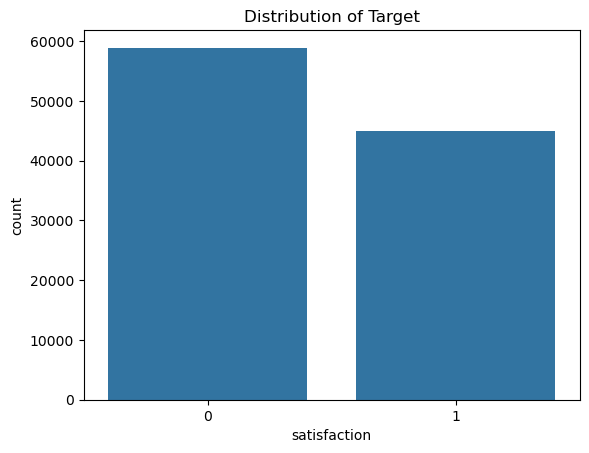

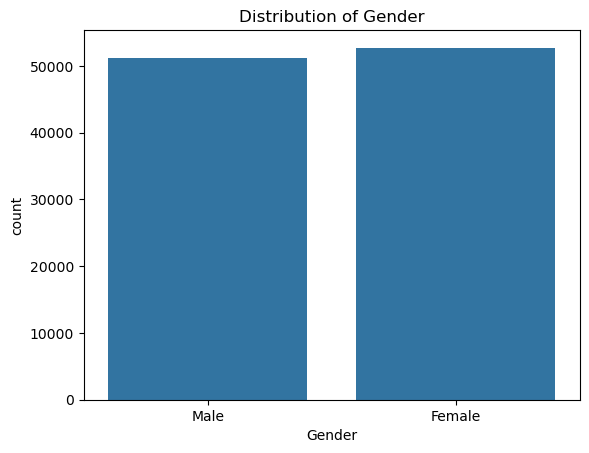

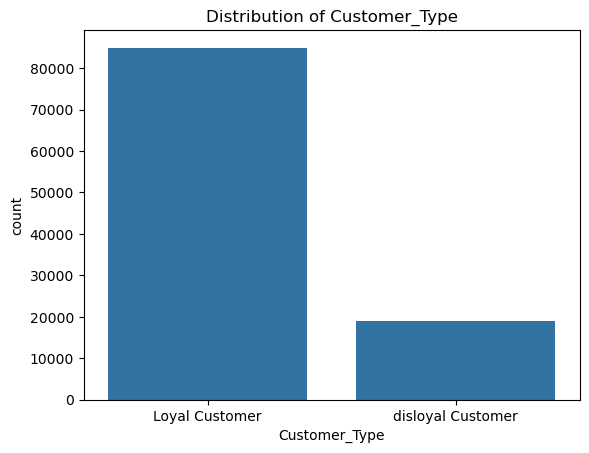

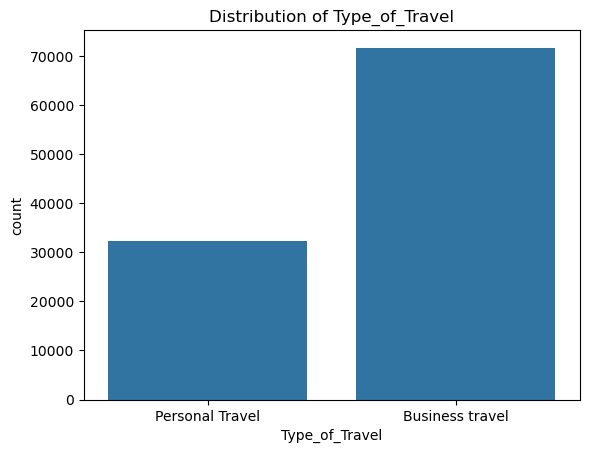

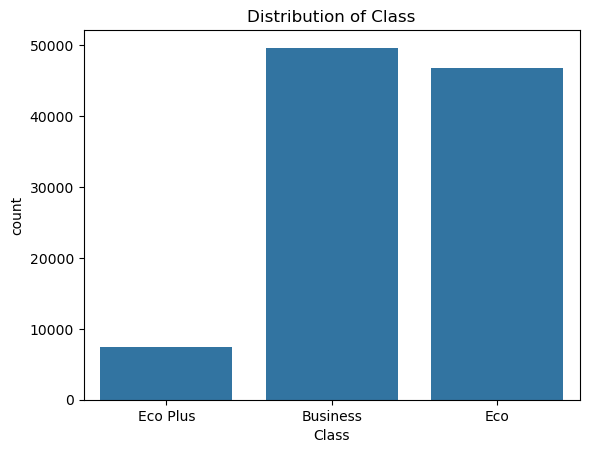

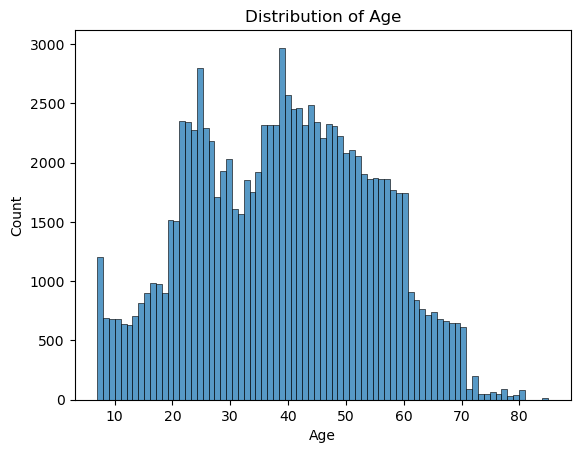

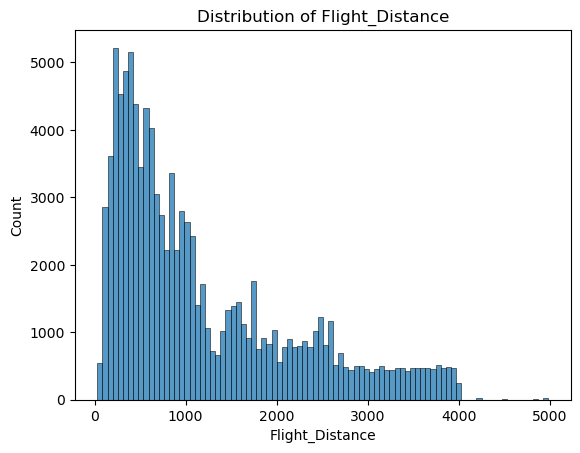

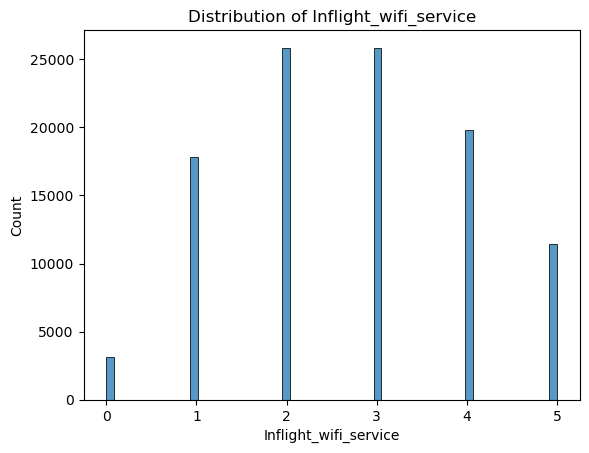

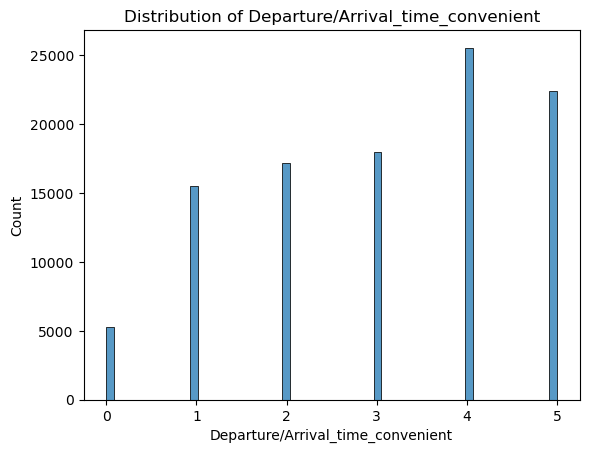

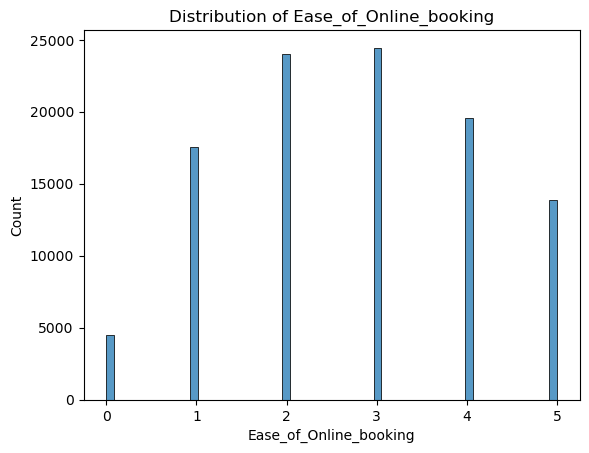

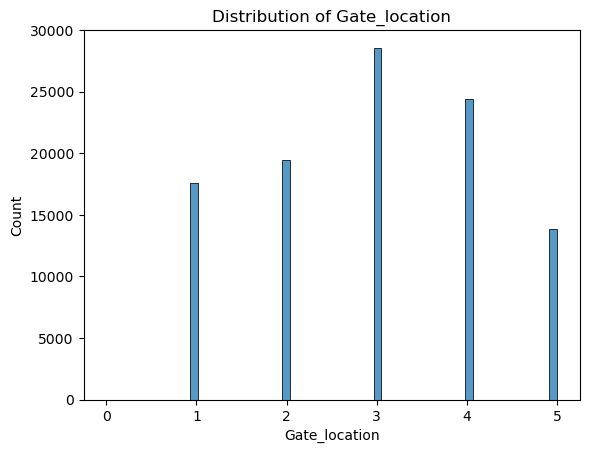

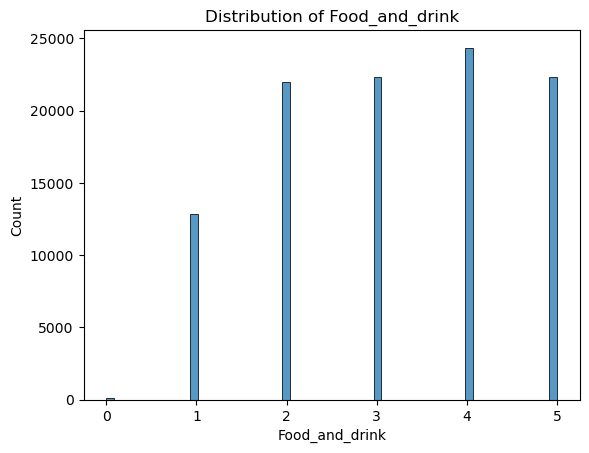

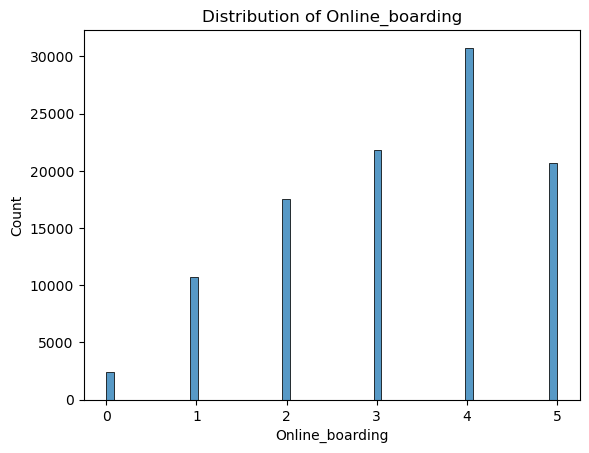

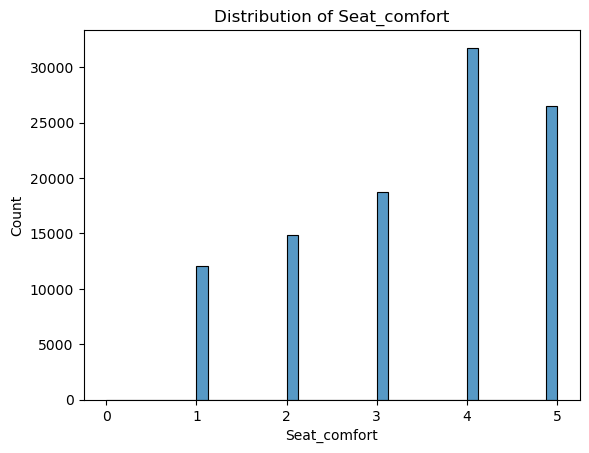

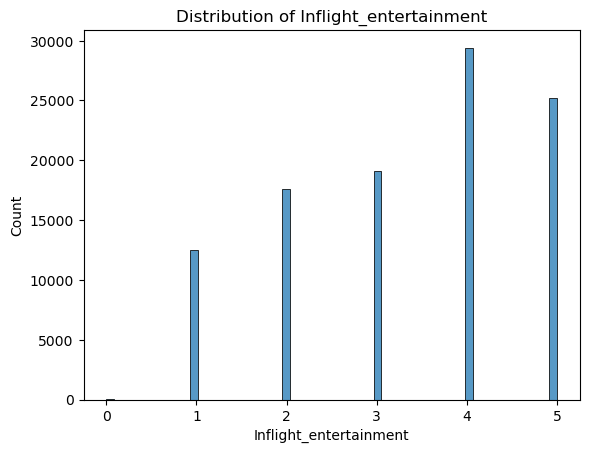

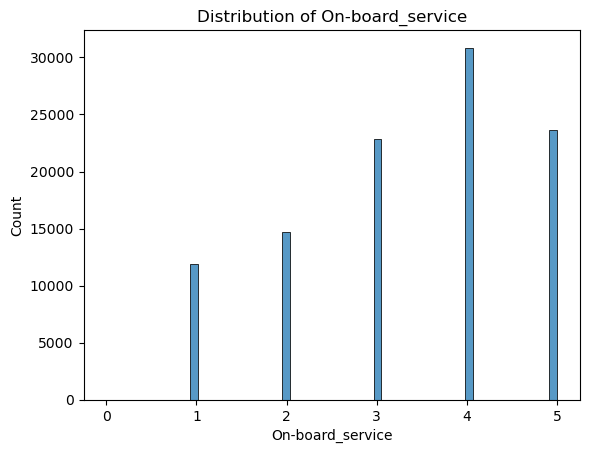

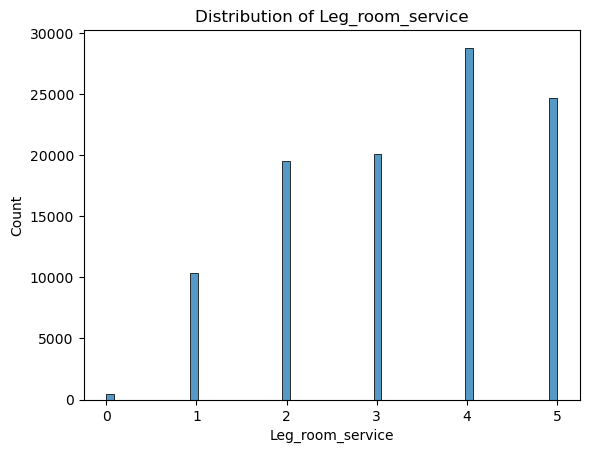

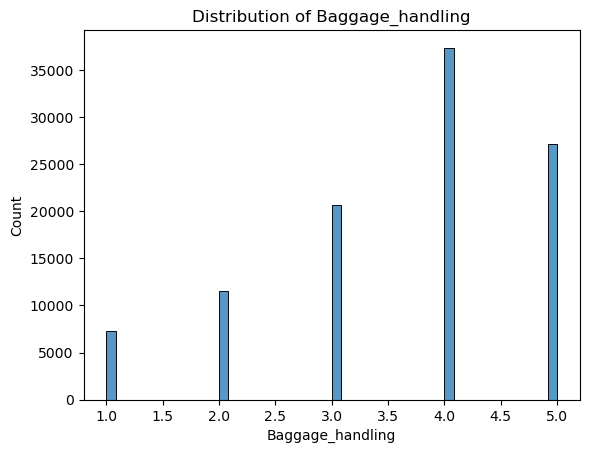

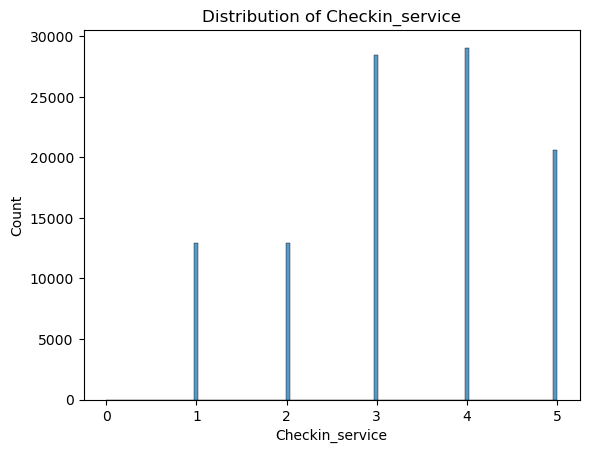

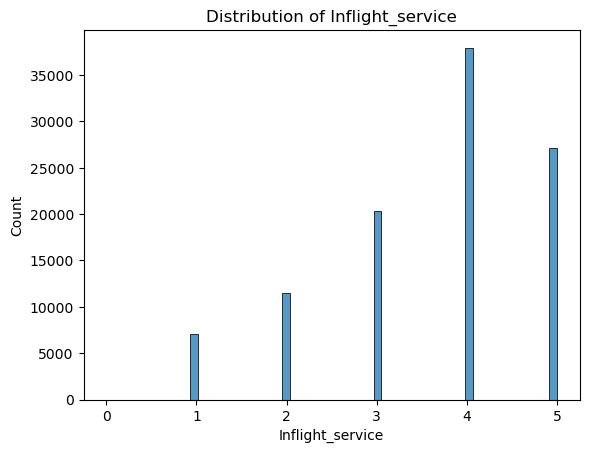

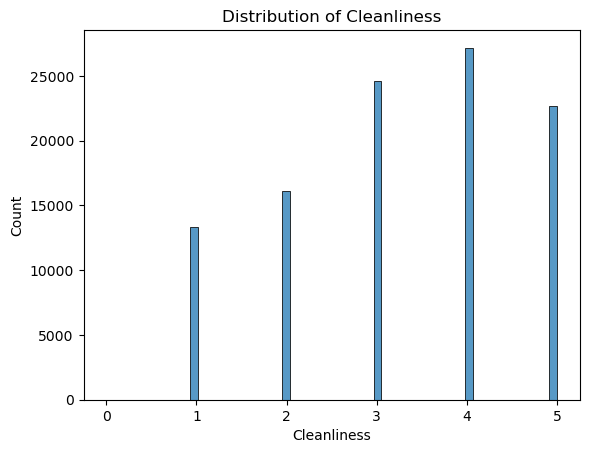

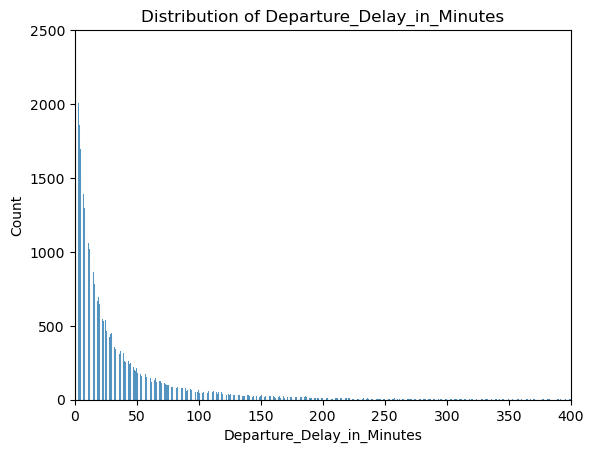

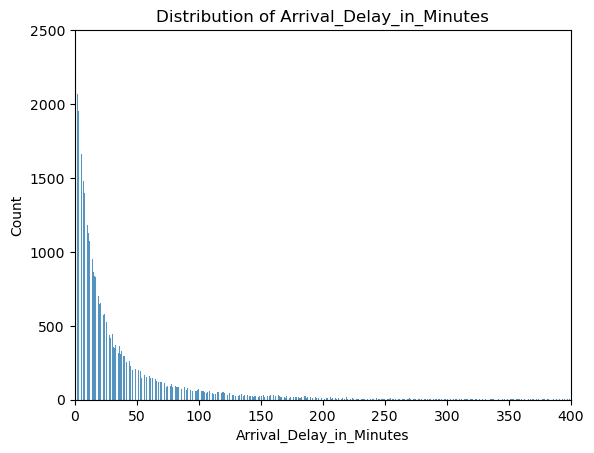

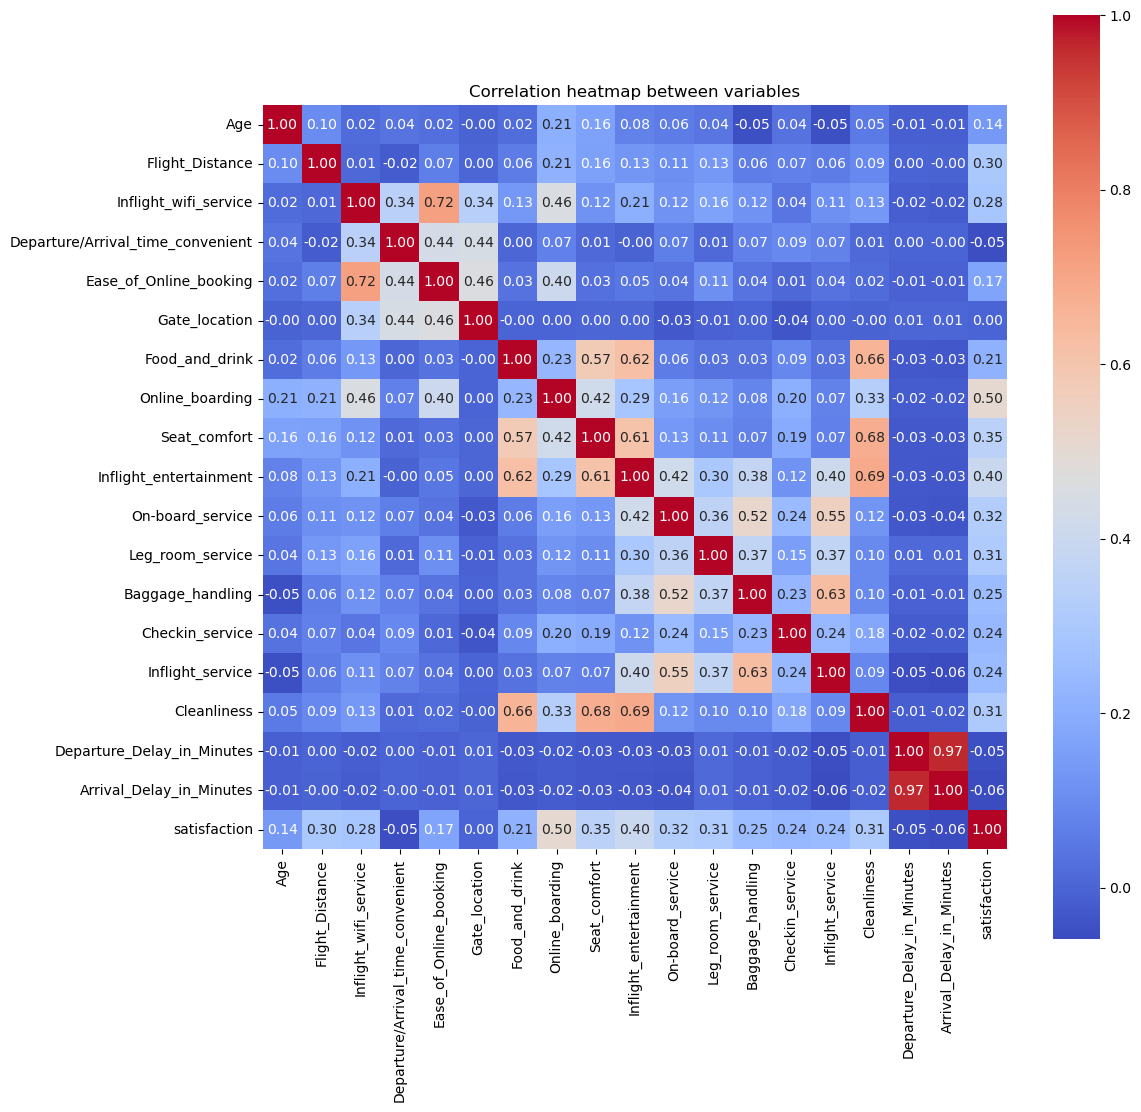


Comment: By looking at the heatmap, we can see that there is a strong positive correlation between 'Departure_Delay_in_Minutes' and 
         'Arrival_Delay_in_Minutes' because the their intersection is 0.97, very close to 1. This means that as one of them increase the other
         one also increase. On the other hand for example there is a very weak correlation, 0.1, between 'Age' and 'Flight_Distance' which means 
         there is almost no linear relationship betwee these two variables.


In [166]:
satisfaction_0=0
satisfaction_1=0
for satisfaction_0_or_1 in train_df["satisfaction"]:
    if satisfaction_0_or_1==0:
        satisfaction_0+=1
    else:
        satisfaction_1+=1
print("Count of satisfaction level 0 / class 0 =",satisfaction_0)
print("Count of satisfaction level 1 / class 1 =",satisfaction_1)
print("\n")
   
print(train_df.isna().sum())
print("There are missing values only in column 'Arrival_Delay_in_Minutes', 310 rows are incomplete.")
print("\n")

categorical_values=["Gender","Customer_Type","Type_of_Travel","Class"]
numerical_values=["Age", "Flight_Distance","Inflight_wifi_service","Departure/Arrival_time_convenient","Ease_of_Online_booking","Gate_location",
                  "Food_and_drink","Online_boarding","Seat_comfort","Inflight_entertainment","On-board_service","Leg_room_service",
                  "Baggage_handling","Checkin_service","Inflight_service","Cleanliness","Departure_Delay_in_Minutes","Arrival_Delay_in_Minutes",
                  "satisfaction"]
print("Categorical values:",categorical_values)
print("Numerical values:",numerical_values)
print("\n")


sns.countplot(data=train_df, x="satisfaction")
plt.title('Distribution of Target')
plt.show()                  
for feature_c in categorical_values:
    plt.figure()
    sns.countplot(data=train_df, x=feature_c)
    plt.title(f"Distribution of {feature_c}")
    plt.show()
for feature_n in numerical_values[:-1]:
    plt.figure()
    if feature_n in ["Arrival_Delay_in_Minutes", "Departure_Delay_in_Minutes"]:
        sns.histplot(train_df[feature_n])
        plt.ylim(0,2500)
        plt.xlim(0,400)
    else:
        sns.histplot(train_df[feature_n])
    plt.title(f"Distribution of {feature_n}")
    plt.show()
print("\n")

plt.figure(figsize=(12,12))
sns.heatmap(train_df[numerical_values].corr(),annot=True,cmap="coolwarm",fmt=".2f",square=True)
plt.title("Correlation heatmap between variables")
plt.show()
print("""\nComment: By looking at the heatmap, we can see that there is a strong positive correlation between 'Departure_Delay_in_Minutes' and 
         'Arrival_Delay_in_Minutes' because the their intersection is 0.97, very close to 1. This means that as one of them increase the other
         one also increase. On the other hand for example there is a very weak correlation, 0.1, between 'Age' and 'Flight_Distance' which means 
         there is almost no linear relationship betwee these two variables.""")
         




#### Q1.2. Data Preprocessing (10p)
- Drop unnecessary columns.
- Encode categorical variables appropriately (e.g. One-Hot Encoding)
- Handle missing values with the best fitting strategy. (impute)
- Normalize or standardize numerical features.

In [106]:
print("""There are no unnecessary column because there aren't a column like 'id' which is not necessary. There are only 'feature' columns and
'target' column which are needed.\n""")

train_df_encoded=train_df.copy()
train_df_encoded=pd.get_dummies(train_df_encoded,columns=categorical_values,drop_first=True)

impute = SimpleImputer(strategy="median")
train_df_encoded["Arrival_Delay_in_Minutes"] = impute.fit_transform(train_df_encoded[["Arrival_Delay_in_Minutes"]])
print("""COMMENT: I imputed 'median' for missing values because mean is sensitive to outliers while median is not. So imputing median instead of mean 
         is a better option.""")

scaler=StandardScaler()
train_df_encoded[numerical_values[:-1]]=scaler.fit_transform(train_df_encoded[numerical_values[:-1]])


There are no unnecessary column because there aren't a column like 'id' which is not necessary. There are only 'feature' columns and
'target' column which are needed.

COMMENT: I imputed 'median' for missing values because mean is sensitive to outliers while median is not. So imputing median instead of mean 
         is a better option.


### Q2. Classification Model Training & Evaluation (20p)
- Convert categorical features to numerical.
- Shuffle and split the data into train (80%) and validation (20%) sets. Do not use built-in or library functions (such as ```train_test_split``` from scikit-learn).

In [122]:
print("I did encoding process in the previous question.\n\n")

predictor=train_df_encoded.drop(columns=["satisfaction"])
prediction=train_df_encoded["satisfaction"]
IDs=np.random.permutation(len(train_df_encoded))
train_set=int(0.8*len(train_df_encoded))
train_IDs=IDs[:train_set]
validation_IDs=IDs[train_set:]
predictor_train=predictor.iloc[train_IDs]
predictor_validation=predictor.iloc[validation_IDs]
prediction_train=prediction.iloc[train_IDs]
prediction_validation=prediction.iloc[validation_IDs]

print("TO PROVE THE DATASET IS SHUFFLED:\n")
print("First 10 row indices before shuffling:",list(train_df_encoded.index[:10]))
print("First 10 row indices after shuffling:", IDs[:10])
print("Total number of rows in the dataset:", len(predictor_train) + len(predictor_validation))
print("Number of rows in training set:", len(predictor_train))
print("Number of rows in validation set:", len(predictor_validation))

I did encoding process in the previous question.


TO PROVE THE DATASET IS SHUFFLED:

First 10 row indices before shuffling: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
First 10 row indices after shuffling: [18893  1663 85612 13903 58848 61325 98837 67670 14066 95888]
Total number of rows in the dataset: 103904
Number of rows in training set: 83123
Number of rows in validation set: 20781


#### Q2.1. Train Models (10p)
- Train at least two classification models. (kNN, Decision Tree, etc.)
- One have to be Logistic Regression.

In [130]:
logistic_regression=LogisticRegression(max_iter=1000)
logistic_regression.fit(predictor_train,prediction_train)

k_Nearest_Neighbors=KNeighborsClassifier(n_neighbors=5)
k_Nearest_Neighbors.fit(predictor_train,prediction_train)

KNeighborsClassifier()

#### Q2.2 Evaluate Model Performance (10p)
Evaluate the model's performance with;
- Accuracy
- Confusion Matrix
- Precision, recall and F1-score

Report metrics and write a short comment about the results.

- Which model performs better?
- Which types of errors are more frequent? (FP vs FN)

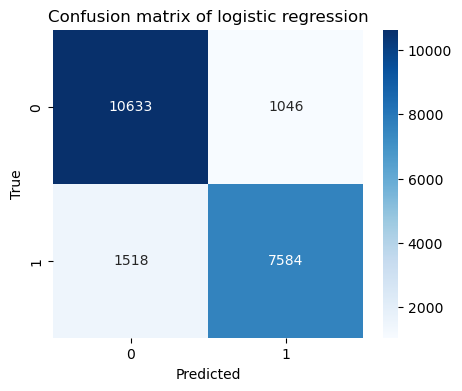

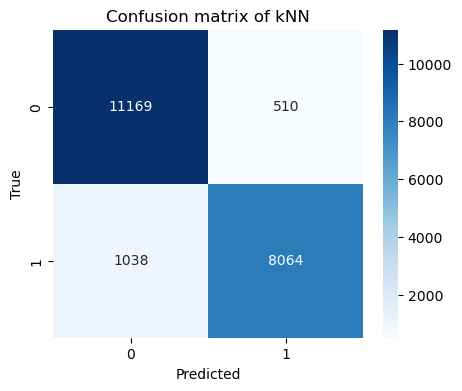



Metrics of logistic regression:
Accuracy: 0.8766180645782204
Precision: 0.8787949015063731
Recall: 0.8332234673698088
F1-score: 0.8554026618542747

Metrics of kNN:
Accuracy: 0.9255088783022953
Precision: 0.940517844646606
Recall: 0.8859591298615689
F1-score: 0.9124236252545824

Comment about results: These results enable us to comment on how well each model worked and we can compare them. I will compare them after this so this part will be short.

Which model performed better?
kNN performed better than logistic regression. Because kNN has greater accuracy (greater accuracy means kNN has more correct predictions than logistic regression) , greater precision (greater precision means there are less false positives), greater recall (greater recall means there are less false negatives) and greater F1-score. That's why kNN had better results in evaluation

Which type of errors are more frequent?
Recall value symbolize FN, precision value symbolize FP. In both models precision is greater th

In [148]:
prediction_logistic_regression = logistic_regression.predict(predictor_validation)
prediction_knn = k_Nearest_Neighbors.predict(predictor_validation)

confusion_matrix_logistic_regression = confusion_matrix(prediction_validation,prediction_logistic_regression)
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix_logistic_regression, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix of logistic regression")
plt.show()

confusion_matrix_knn = confusion_matrix(prediction_validation,prediction_knn)
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix_knn, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix of kNN")
plt.show()

tn, fp, fn, tp = confusion_matrix_logistic_regression.ravel()
accuracy = (tp + tn)/(tp + tn + fp + fn)
precision = tp/(tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)
print("\n\nMetrics of logistic regression:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

print("\nMetrics of kNN:")
tn, fp, fn, tp = confusion_matrix_knn.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

print("\nComment about results: These results enable us to comment on how well each model worked and we can compare them. I will compare them after this so this part will be short.")
print("\nWhich model performed better?\nkNN performed better than logistic regression. Because kNN has greater accuracy (greater accuracy means kNN has more correct predictions than logistic regression) , greater precision (greater precision means there are less false positives), greater recall (greater recall means there are less false negatives) and greater F1-score. That's why kNN had better results in evaluation""")
print("\nWhich type of errors are more frequent?\nRecall value symbolize FN, precision value symbolize FP. In both models precision is greater than recall so in both models FN are more frequent than FP.""")


### Q3. Feature Importance (10p)

#### Q3.1. Identify the Most Important Features (5p)
- Choose one of your trained model.
- Use coefficients (Logistic Regression) or feature importance (Tree-based models)
- Rank the top features influencing passanger satisfaction.

In [405]:
features=predictor_train.columns
coefficients=logistic_regression.coef_[0]
coefficient_df = pd.DataFrame({"Feature":features,"Coefficient": coefficients})
coefficient_df["Importance"] = np.abs(coefficient_df["Coefficient"])
ranking=coefficient_df.sort_values(by="Importance", ascending=False)
print("Ranked order of features from most influencing to least influencing:")
for feature in ranking["Feature"]:
    print(feature)



Ranked order of features from most influencing to least influencing:
Type_of_Travel_Personal Travel
Customer_Type_disloyal Customer
Class_Eco Plus
Online_boarding
Class_Eco
Inflight_wifi_service
Checkin_service
On-board_service
Arrival_Delay_in_Minutes
Leg_room_service
Cleanliness
Ease_of_Online_booking
Departure/Arrival_time_convenient
Departure_Delay_in_Minutes
Baggage_handling
Inflight_service
Age
Seat_comfort
Inflight_entertainment
Gender_Male
Gate_location
Food_and_drink
Flight_Distance


Q3.2 Discussions (5p)
- What insights can an airline company gain from this model?

In [162]:
print("From this model the airline company can easily see which feature affects satisfaction level more. By looking at this they can invest their money more strategically. For example spending the same amount of money on specific features that affect the satisfaction level more than others will be a correct way of investment. In this way they can increase satisfaction level with minimum payment.""") 

From this model the airline company can easily see which feature affects satisfaction level more. By looking at this they can invest their money more strategically. For example spending the same amount of money on specific features that affect the satisfaction level more than others will be a correct way of investment. In this way they can increase satisfaction level with minimum payment.


### **PART 2. CLUSTERING (50p)**

# **DATASET DESCRIPTION**

**Dataset Path:** `Data/country_data.csv`

---

This dataset contains socio-economic and health indicators for **167 countries**. Your task is to categorize these countries into clusters that represent different levels of development.

### **Variables**

| Variable | Description | Type |
|----------|-------------|------|
| `country` | Name of the country | Categorical (identifier) |
| `child_mort` | Death of children under 5 years of age per 1000 live births | Continuous |
| `exports` | Exports of goods and services per capita (% of GDP) | Continuous |
| `health` | Total health spending per capita (% of GDP) | Continuous |
| `imports` | Imports of goods and services per capita (% of GDP) | Continuous |
| `income` | Net income per person | Continuous |
| `inflation` | Annual growth rate of Total GDP (%) | Continuous |
| `life_expec` | Average number of years a newborn child would live | Continuous |
| `total_fer` | Number of children that would be born to each woman | Continuous |
| `gdpp` | GDP per capita | Continuous |

### **Context**

Imagine you are a data scientist working for an international humanitarian organization. Your organization has limited resources and needs to identify which countries require the most urgent assistance. By clustering countries based on development indicators, you can help decision-makers allocate resources more effectively.

**Think about:**
- What characteristics define "developed" vs "developing" countries?
- Are there intermediate groups? How many distinct groups exist in the data?
- Which variables are most important for distinguishing between country development levels?

### Q1. Data Loading and Initial Exploration (10p)

### Q1.1 Data loading and visualization (5p)
Load the dataset and perform initial exploration:
1. Create correlation heatmap
2. Create scatter plots showing relationship between variables
3. Visualize the relationships between features by displaying their pairwise correlation values in a heatmap.

**Questions to Answer:**
- Which variables are highly correlated? What does this mean for our analysis?
- Can you identify any visible clusters in the scatter plots?

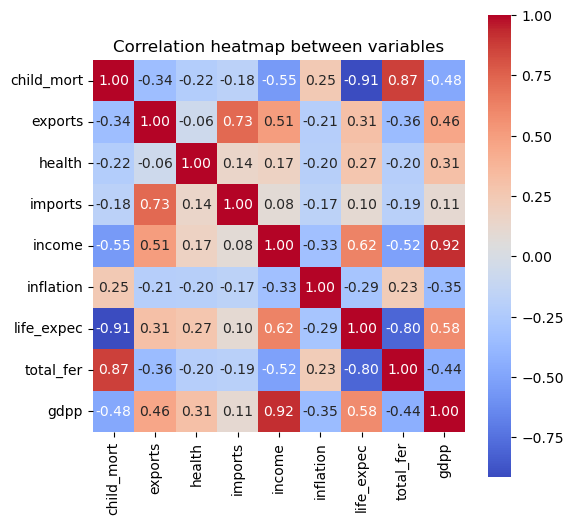

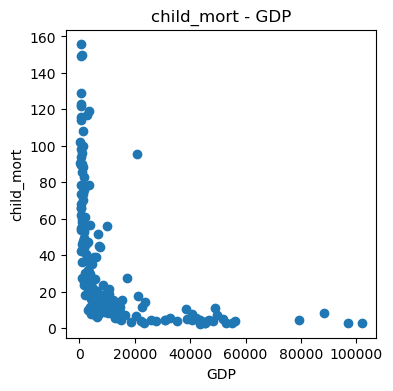

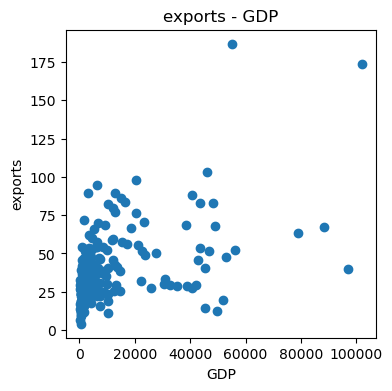

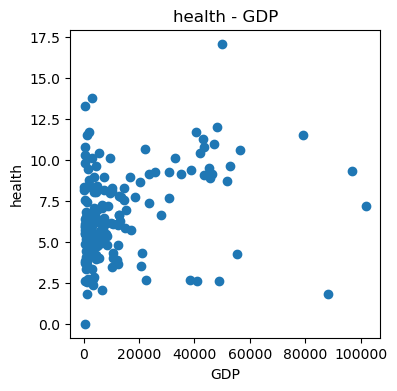

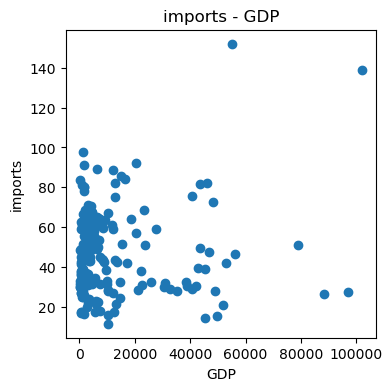

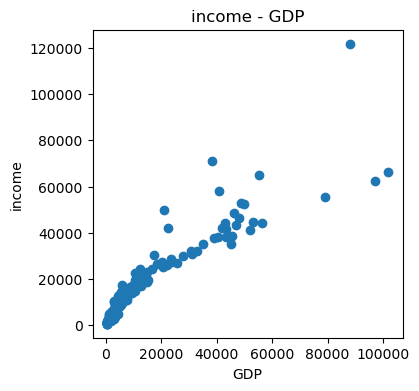

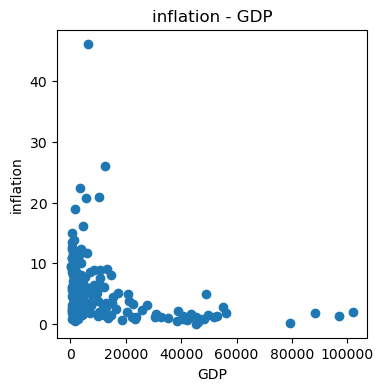

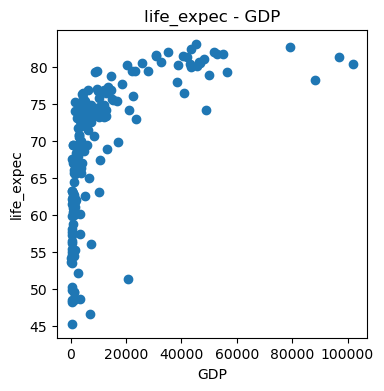

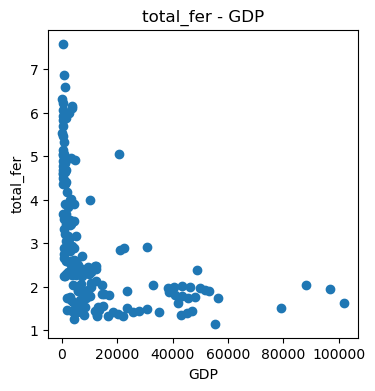

Questions to answer:

1.) For example 'life_expec' and 'child_mort' are highly correlated because the correlation is 0.91 on heatmap. This means that as one of them increase, the other will also increase. In other words they have very very similar effects on the target variable.

2.) If we look at the scatter plots we can see kinds of clustering in second, third , fourth and sixth graphs. But especially in the sixth graph, there is a dominant cluster on the bottom left part of the graph.


In [433]:
numerical_value=["child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
plt.figure(figsize=(6,6))
sns.heatmap(country_df[numerical_value].corr(), annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation heatmap between variables")
plt.show()
for i in numerical_value:
    if i != "gdpp":
        plt.figure(figsize=(4,4))
        plt.scatter(country_df["gdpp"], country_df[i])
        plt.xlabel("GDP")
        plt.ylabel(i)
        plt.title(f"{i} - GDP")
        plt.show()

print("Questions to answer:")
print("\n1.) For example 'life_expec' and 'child_mort' are highly correlated because the correlation is 0.91 on heatmap. This means that as one of them increase, the other will also increase. In other words they have very very similar effects on the target variable.")
print("\n2.) If we look at the scatter plots we can see kinds of clustering in second, third , fourth and sixth graphs. But especially in the sixth graph, there is a dominant cluster on the bottom left part of the graph.")

  ### Q1.2 Data preprocessing (5p)
  Prepare data for clustering:
  1. Handle missing values (if present)
  2. Decide Decide how to handle outliers (keep, remove, or transform) - **justify your decision**
  3. Apply appropriate scaling/normalization

**Critical Question:**
- Why is feature scaling essential for K-Means ? What would happen if you didn't scale the data?


In [198]:
print("There are no missing values:")
print(country_df.isna().sum())

print("\nOutlier handling: I will keep outliers because this is a real world data and decision-makers want to see these extreme conditions. These extreme situations cannot be ignored.""")

scaler=StandardScaler()
country_df[numerical_value]=scaler.fit_transform(country_df[numerical_value])

print("""\nAnswer to critical question:\nFeature scaling is essential because in K-Means we use euclidean distance in which we get squares of distances to classify points into clusters. Assume that values of one column vary from 10 to 100 while values of another column vary from 10 to 10000. In this case values of the second column will dominate the values of first column. Values of first column are almost 'ignored' in this situation. Feature scaling prevents this situation. If we didn't scale the data some columns will dominate others and the result will not be true and logical.""")

There are no missing values:
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Outlier handling: I will keep outliers because this is a real world data and decision-makers want to see these extreme conditions. These extreme situations cannot be ignored.

Answer to critical question:
Feature scaling is essential because in K-Means we use euclidean distance in which we get squares of distances to classify points into clusters. Assume that values of one column vary from 10 to 100 while values of another column vary from 10 to 10000. In this case values of the second column will dominate the values of first column. Values of first column are almost 'ignored' in this situation. Feature scaling prevents this situation. If we didn't scale the data some columns will dominate others and the result will not be true and logical.


### Q2 K-Means Clustering (20p)

### Q2.1 Apply K-Means clustering to the preprocessed data (10p)

1. Use the **Elbow Method** to determine the optimal number of clusters (test k = 2 to 10)
2. Also calculate the **Silhouette Score** for each k value
3. Choose the optimal k value and **justify your choice**
4. Apply K-Means with your chosen k
5. Visualize the clusters (you may use the first 2 PCA components)

**Questions to Answer:**
- What k value did you choose and why? Do the Elbow and Silhouette methods agree?
- What is the limitation of using only 2D visualization for data with 9 features?
- List 3-5 countries from each cluster. Does the grouping make intuitive sense?

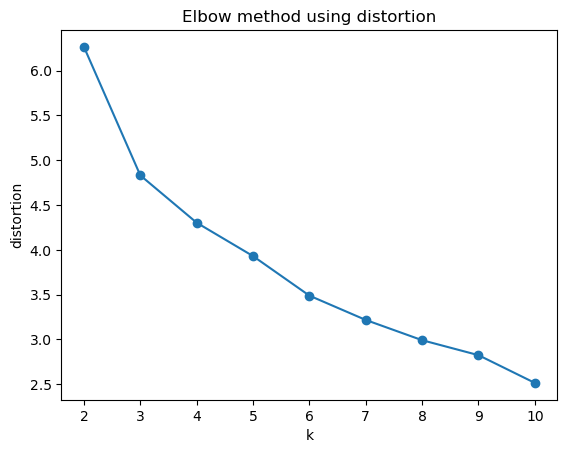


COMMENT:Accoring to Elbow method, k=3 is the most optimal k value because there is a steep fall 
from k=2 to k=3 while the fall is not that steep from k=3 to k=4. This means k=3 is the 
most optimal value since it the 'connection point' of a steep and less steep fall.

Silhouette scores for different k values:
Score for k=2 is 0.2818688783290146.
Score for k=3 is 0.2891699367485049.
Score for k=4 is 0.28883966918926585.
Score for k=5 is 0.29920913631831214.
Score for k=6 is 0.2526482827944115.
Score for k=7 is 0.23199009345464952.
Score for k=8 is 0.20289626880773975.
Score for k=9 is 0.19339000310986698.
Score for k=10 is 0.202278575838745.

COMMENT:The most optimal k value if we sum up the informations from Elbow Method and Silhouette Scores is k=3. Accoring to silhouette scores (a greater silhouette score means better clustering) the score for k=5 is a bit higher than k=3 but since the difference between them is so small this is neglectable.K=3 is also more logical because we can e

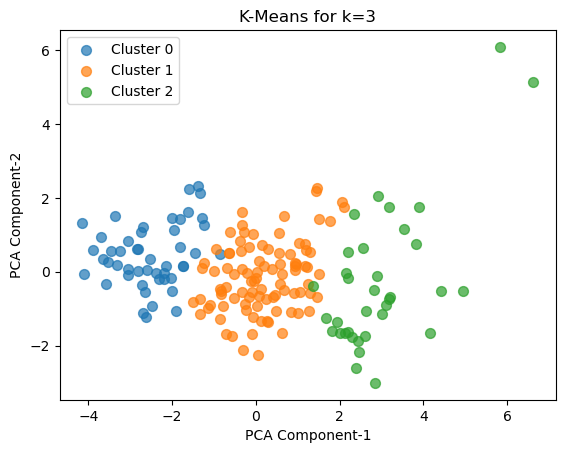

Questions to answer:

1.) I chose k=3. I explained the reason above, it was asked as a question previously so i will copy and paste that part:
COMMENT:The most optimal k value if we sum up the informations from Elbow Method and Silhouette Scores is k=3. Accoring to silhouette scores (a greater silhouette score means better clustering) the score for k=5 is a bit higher than k=3 but since the difference between them is so small this is neglectable.K=3 is also more logical because we can easily and logically classify countries into 3 (such as bad-mid-good) according to development but if we look at the second closest k value, which is k=5, classifying countries into 5 clusters according to their development levels is not logical and hard.

2.) We used 2 PCA components because we can easily visualize and comment on a 2 dimentional plot, we can't understand a 9 dimentional plot. But on the other hand we limitted a larger data with 9 features. This may cause loss of information since we used

In [336]:
"""I imported warnings library because without it i was still getting the same output but there were
warning messages before the graph."""
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")

distortion=[]
for k in range(2,11):
    kmeans=KMeanss(n_clusters=k,random_state=42)
    kmeans.fit(country_df[numerical_value])
    distortion.append(kmeans.inertia_/len(country_df))
plt.figure()
plt.plot(range(2,11),distortion,marker="o")
plt.xlabel("k")
plt.ylabel("distortion")
plt.title("Elbow method using distortion")
plt.show()
print("""\nCOMMENT:Accoring to Elbow method, k=3 is the most optimal k value because there is a steep fall 
from k=2 to k=3 while the fall is not that steep from k=3 to k=4. This means k=3 is the 
most optimal value since it the 'connection point' of a steep and less steep fall.""")

print("\nSilhouette scores for different k values:")
for k in range(2,11):
    kmeans=KMeanss(n_clusters=k,random_state=42)
    predict=kmeans.fit_predict(country_df[numerical_value])
    s_score=silhouette_score(country_df[numerical_value],predict)
    print(f"Score for k={k} is {s_score}.")

print("\nCOMMENT:The most optimal k value if we sum up the informations from Elbow Method and Silhouette Scores is k=3. Accoring to silhouette scores (a greater silhouette score means better clustering) the score for k=5 is a bit higher than k=3 but since the difference between them is so small this is neglectable.K=3 is also more logical because we can easily and logically classify countries into 3 (such as bad-mid-good) according to development but if we look at the second closest k value, which is k=5, classifying countries into 5 clusters according to their development levels is not logical and hard.\n")

country_df_clustered=country_df.copy()
kmeans=KMeanss(n_clusters=3,random_state=42)
country_df_clustered["cluster"]=kmeans.fit_predict(country_df[numerical_value])

pca_component = PCA(n_components=2)
predictor_pca = pca.fit_transform(country_df[numerical_value])
plt.figure()
for cluster in range(3):
    plt.scatter(predictor_pca[country_df_clustered['cluster']==cluster, 0],predictor_pca[country_df_clustered['cluster']==cluster, 1],label=f'Cluster {cluster}', s=50, alpha=0.7)
plt.xlabel("PCA Component-1")
plt.ylabel("PCA Component-2")
plt.title(f"K-Means for k=3")
plt.legend()
plt.show()

print("Questions to answer:")
print("\n1.) I chose k=3. I explained the reason above, it was asked as a question previously so i will copy and paste that part:")
print("COMMENT:The most optimal k value if we sum up the informations from Elbow Method and Silhouette Scores is k=3. Accoring to silhouette scores (a greater silhouette score means better clustering) the score for k=5 is a bit higher than k=3 but since the difference between them is so small this is neglectable.K=3 is also more logical because we can easily and logically classify countries into 3 (such as bad-mid-good) according to development but if we look at the second closest k value, which is k=5, classifying countries into 5 clusters according to their development levels is not logical and hard.\n")
print("2.) We used 2 PCA components because we can easily visualize and comment on a 2 dimentional plot, we can't understand a 9 dimentional plot. But on the other hand we limitted a larger data with 9 features. This may cause loss of information since we used 2 of the features while ignoring the other 7. Since this limitation may cause differences in calculations like distortion, when we look at the graph all three clusters are meaningfull and well clustered. So we did a good clustering although we limitted our data.")
print("\n3.)")
for cluster in range(3):
    print(f"\nCountries for cluster {cluster}:")
    country_names=country_df_clustered[country_df_clustered['cluster'] == cluster]['country'].head(5).values
    for name in country_names:
        print(name)
print("\nThe grouping do make a intuitive sense because if we look at countries in each cluster, they have a similar development level. Also we can say that development levels of countries in different clusters are different. To summarize this over an example; Afghanistan (Cluster 0) and Angola (Cluster 0) have a similar development level but Afghanistan (Cluster 0) and Belgium (Cluster 2) has different development levels, Belgium is more developed than Afghanistan. If we order clusters from least developed to most developed, the order would be Cluster 0, Cluster 1 and Cluster 2 respectively.")

    
    

## Q2.2 Hierarchical Agglomerative Clustering (10 Points)

Apply Hierarchical Clustering and compare with K-Means:

1. Apply Hierarchical Agglomerative Clustering (HAC) to your scaled data
2. Create a **dendrogram** to visualize the hierarchical structure
3. Based on the dendrogram, determine the optimal number of clusters by identifying where to "cut" the tree
4. Cut the dendrogram at your chosen level and obtain cluster labels
5. Compare the resulting clusters with your K-Means results

**Questions to Answer:**
- Looking at the dendrogram, at what height/distance would you cut to get meaningful clusters? Why?
- Does the hierarchical structure suggest the same number of clusters as K-Means?
- How similar are the HAC clusters to the K-Means clusters? Do the same countries tend to be grouped together?

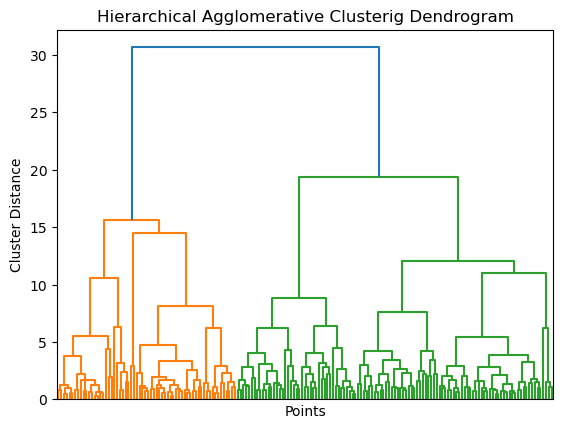

COMMENT: Based on the dendrogram the optimal k value to 'cut' the tree is k=3. Because there are very large distances between the three main clusters while distances within these three clusters not large. By just looking at the dendrogram we can already see that data is clustered in 3 main 'towers'.




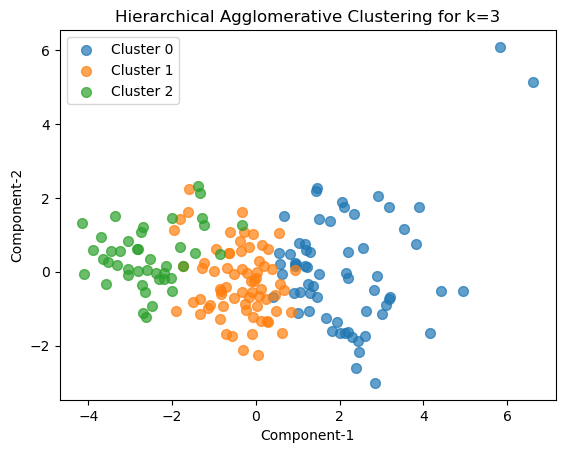

Questions to answer:

1.) We can cut at a point where cluster distance is 17 (y=17). Based on the dendrogram the optimal k value to 'cut' the tree is k=3 which corresponds to a cluster distance of approximately 17. Because there are very large distances between the three main clusters while distances within these three clusters not large. By just looking at the dendrogram we can already see that data is clustered in 3 main 'towers'.

2.) Yes, both methods suggest 3 clusters for this dataset.

3.) They are quite similar. When we look at graphs of KMeans and HAC all 3 clusters look very similar, most of data points belong to the same cluster in both graphs.
For example these 5 countries are all in cluster 1 in both KMeans and HAC:
Albania
Algeria
Argentina
Armenia
Azerbaijan


In [359]:
linkage_matrix=linkage(country_df[numerical_value],method="ward")
plt.figure()
dendrogram(linkage_matrix,no_labels=True)
plt.title("Hierarchical Agglomerative Clusterig Dendrogram")
plt.xlabel("Points")
plt.ylabel("Cluster Distance")
plt.show()

print("COMMENT: Based on the dendrogram the optimal k value to 'cut' the tree is k=3. Because there are very large distances between the three main clusters while distances within these three clusters not large. By just looking at the dendrogram we can already see that data is clustered in 3 main 'towers'.")

hierarchical_agglomerative_clustering=AgglomerativeClustering(n_clusters=3,linkage="ward")
country_df_clustered["HAC_cluster"]=hierarchical_agglomerative_clustering.fit_predict(country_df[numerical_value])

print("\n")
plt.figure()
for cluster in range(3):
    plt.scatter(predictor_pca[country_df_clustered['HAC_cluster'] == cluster, 0],predictor_pca[country_df_clustered['HAC_cluster'] == cluster, 1],label=f"Cluster {cluster}",s=50,alpha=0.7)
plt.xlabel("Component-1")
plt.ylabel("Component-2")
plt.title("Hierarchical Agglomerative Clustering for k=3")
plt.legend()
plt.show()

print("Questions to answer:\n")
print("1.) We can cut at a point where cluster distance is 17 (y=17). Based on the dendrogram the optimal k value to 'cut' the tree is k=3 which corresponds to a cluster distance of approximately 17. Because there are very large distances between the three main clusters while distances within these three clusters not large. By just looking at the dendrogram we can already see that data is clustered in 3 main 'towers'.")
print("\n2.) Yes, both methods suggest 3 clusters for this dataset.")
print("\n3.) They are quite similar. When we look at graphs of KMeans and HAC all 3 clusters look very similar, most of data points belong to the same cluster in both graphs.")
common_countries = country_df_clustered[(country_df_clustered['cluster'] == 1)&(country_df_clustered['HAC_cluster'] == 1)]['country'].head(5)
print("For example these 5 countries are all in cluster 1 in both KMeans and HAC:")
for c in list(common_countries):
    print(c)




### Q3 Dimensionality Reduction with PCA (20p)

## 3.1 Applying PCA (10 Points)

Apply PCA to understand the underlying structure of the data:

1. Apply PCA to the scaled data (use all components initially)
2. Determine how many components are needed to explain at least **80%** and **95%** of the variance
3. Visualize the data using the first two principal components (scatter plot)

**Questions to Answer:**
- Do you see any natural groupings in the 2D PCA visualization?

Number of components needed to explain at least 80% of variance is 4
Number of components needed to explain at least 95% of variance is 5




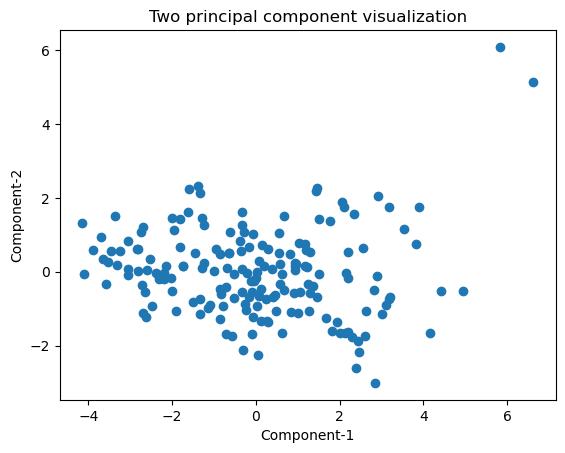

Questions to answer:

1.) I can see one grouping towards the center of the graph, around point(0,0). But i can also see outliers towards top right of the graph and there are moderate distribution of data points at the ends of the middle cluster. Middle cluster is strongly packed, many data points lie there.


In [383]:
pca_to_scaled_data=PCA()
country_pca_to_scaled_data=pca_to_scaled_data.fit_transform(country_df[numerical_value])
individual_variance=pca_to_scaled_data.explained_variance_ratio_
cumulative_variance=np.cumsum(individual_variance)
variance_80=np.argmax(cumulative_variance>=0.8)+1
variance_95=np.argmax(cumulative_variance>=0.95)+1
print("Number of components needed to explain at least 80% of variance is",variance_80)
print("Number of components needed to explain at least 95% of variance is",variance_95)

print("\n")
pca_first_two_component=PCA(n_components=2)
country_pca_first_two_component=pca_first_two_component.fit_transform(country_df[numerical_value])
plt.figure()
plt.scatter(country_pca_first_two_component[:,0],country_pca_first_two_component[:,1])
plt.xlabel("Component-1")
plt.ylabel("Component-2")
plt.title("Two principal component visualization")
plt.show()

print("Questions to answer:")
print("\n1.) I can see one grouping towards the center of the graph, around point(0,0). But I can also see outliers towards top right of the graph and there are moderate distribution of data points at the ends of the middle cluster. Middle cluster is strongly packed, many data points lie there.")

## 3.2 K-Means Clustering with PCA (10 Points)

Apply K-Means to the PCA-reduced data:

1. Select the number of principal components based on your analysis in 3.1
2. Apply the Elbow Method and Silhouette Score on the PCA-reduced data
3. Determine the optimal k and apply K-Means
4. Visualize the clusters in the PCA space

**Questions to Answer:**
- Is the optimal k the same as before PCA? If different, why might this be?
- Are the clusters more or less separable in the PCA space?

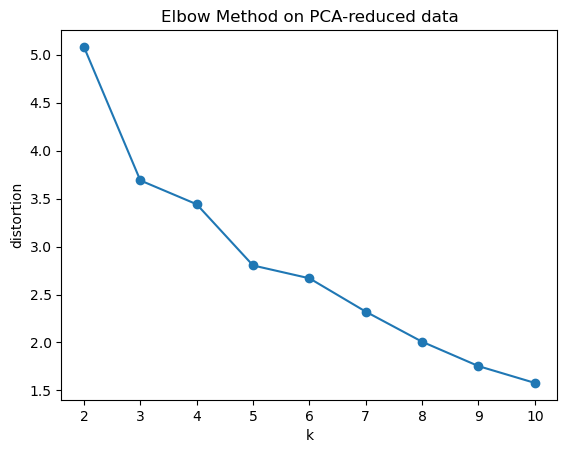


Silhouette scores for different k values:
Score for k=2 is 0.3186005524785535.
Score for k=3 is 0.3281713350401242.
Score for k=4 is 0.24751873712186578.
Score for k=5 is 0.2787117716562053.
Score for k=6 is 0.2714855876520049.
Score for k=7 is 0.2643005688719955.
Score for k=8 is 0.25868554182041437.
Score for k=9 is 0.2732264065935232.
Score for k=10 is 0.2734709295586895.

COMMENT: The most optimal k valie is 3 in both Elbow Method and Silhouette Scores. K=3 is the elbow point since it is in between a steep fall and a slightly steep fall. Also the silhouette score of k=3 is the greatest among the other k values Thats why k=3 is the most optimal k value.




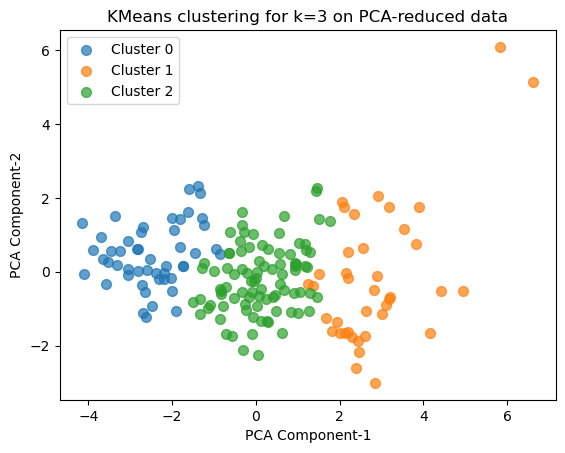

Questions to answer:

1.) Yes, the optimal k is the same as before PCA. The optimal k value is 3.

2.) Yes, clusters are more seperable in PCA space. Data points on clusters are more seperated from each other, I mean same coloured dots are not on top of each other. There are more visible 'borders' between these clusters than KMeans. Using PCA improved our clustering.


In [401]:
# I WILL USE THE RESULT OF 80% VARIANCE WHICH WAS 4.
pca_component_reduced=PCA(n_components=4)#RESULT OF 80% VARIANCE
predictor_pca_reduced=pca_component_reduced.fit_transform(country_df[numerical_value])

distortion_reduced=[]
for k in range(2,11):
    kmeans=KMeanss(n_clusters=k,random_state=42)
    kmeans.fit(predictor_pca_reduced)
    distortion_reduced.append(kmeans.inertia_/len(predictor_pca_reduced))
plt.figure()
plt.plot(range(2,11),distortion_reduced,marker="o")
plt.xlabel("k")
plt.ylabel("distortion")
plt.title("Elbow Method on PCA-reduced data")
plt.show()

print("\nSilhouette scores for different k values:")
for k in range(2,11):
    kmeans=KMeanss(n_clusters=k,random_state=42)
    predict=kmeans.fit_predict(predictor_pca_reduced)
    s_score=silhouette_score(predictor_pca_reduced,predict)
    print(f"Score for k={k} is {s_score}.")

print("\nCOMMENT: The most optimal k valie is 3 in both Elbow Method and Silhouette Scores. K=3 is the elbow point since it is in between a steep fall and a slightly steep fall. Also the silhouette score of k=3 is the greatest among the other k values Thats why k=3 is the most optimal k value.")

print("\n")
kmeans_pca_reduced=KMeanss(n_clusters=3,random_state=42)
country_df_clustered["cluster_pca_reduced"]=kmeans_pca_reduced.fit_predict(predictor_pca_reduced)
plt.figure()
for cluster in range(3):
    plt.scatter(predictor_pca_reduced[country_df_clustered["cluster_pca_reduced"]==cluster,0],predictor_pca_reduced[country_df_clustered["cluster_pca_reduced"]==cluster,1],label=f"Cluster {cluster}",s=50,alpha=0.7)
plt.xlabel("PCA Component-1")
plt.ylabel("PCA Component-2")
plt.title("KMeans clustering for k=3 on PCA-reduced data")
plt.legend()
plt.show()

print("Questions to answer:")
print("\n1.) Yes, the optimal k is the same as before PCA. The optimal k value is 3.")
print("\n2.) Yes, clusters are more seperable in PCA space. Data points on clusters are more seperated from each other, I mean same coloured dots are not on top of each other. There are more visible 'borders' between these clusters than KMeans. Using PCA improved our clustering.")

# SUBMIT FORMAT

* **<-zip>**
  - **studentID_name_surname_hw4.ipynb**


# PLAGIARISM

All work on assignments must be done individually. You are encouraged to discuss the given assignments with your classmates, but these discussions should be carried out in an abstract way. That is, discussions related to a particular solution to a specific probem (either in actual code or in pseudocode) will not be tolerated. In short, turning in someone else’s work (including work available on the internet), in whole or in part, as your own will be considered as a violation of academic integrity. Please note that the former conditions also hold for the material attained using AI tools, including ChatGPT, GitHub Copilot, etc.